In [337]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy.stats import expon
sns.set(style="whitegrid", palette="deep")

## Normal Distribution

In [228]:
# Parameters for the normal distribution
mean = 100      # Mean of the distribution
std_dev = 20   # Standard deviation
graph_std_devs = 4 
num_market_participants = 1000
prices = np.linspace(mean - graph_std_devs * std_dev, mean + graph_std_devs * std_dev, mean)
pdf_dist = norm.pdf(prices, loc=mean, scale=std_dev) * num_market_participants
cdf_dist = (1 - norm.cdf(prices, loc=mean, scale=std_dev)) * num_market_participants # used for Demand. We use "1 - " because we count higher ones first
cdf_dist_supply = norm.cdf(prices, loc=mean, scale=std_dev) * num_market_participants

### Normal Demand

#### Basic Normal Dist

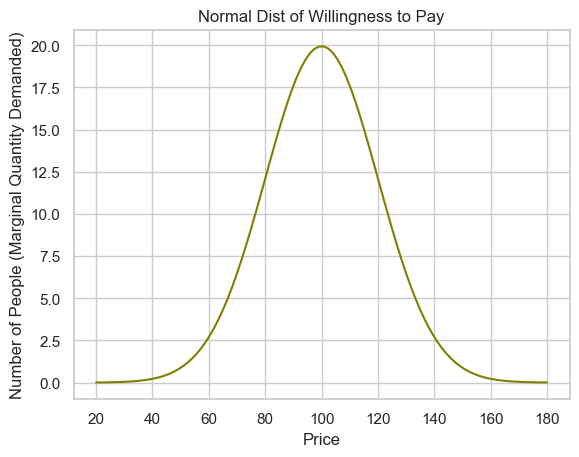

In [220]:
plt.plot(prices, pdf_dist, color='olive')
plt.title('Normal Dist of Willingness to Pay')
plt.ylabel('Number of People (Marginal Quantity Demanded)')
plt.xlabel('Price')
plt.grid(True)
plt.show()

#### Normal Dist Transposed

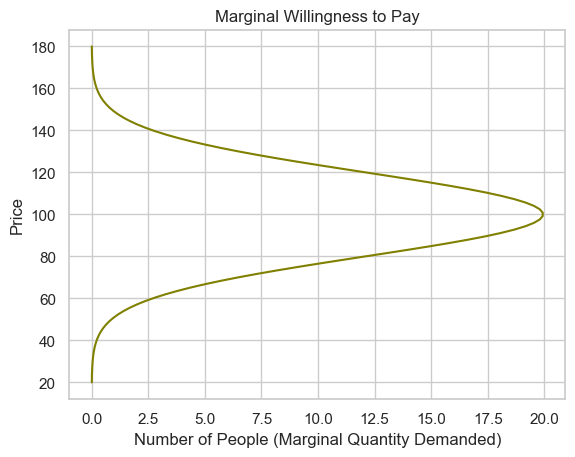

In [218]:
plt.plot(pdf_dist, prices, color='olive')
plt.title('Marginal Willingness to Pay')
plt.xlabel('Number of People (Marginal Quantity Demanded)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#### Implied Demand Curve

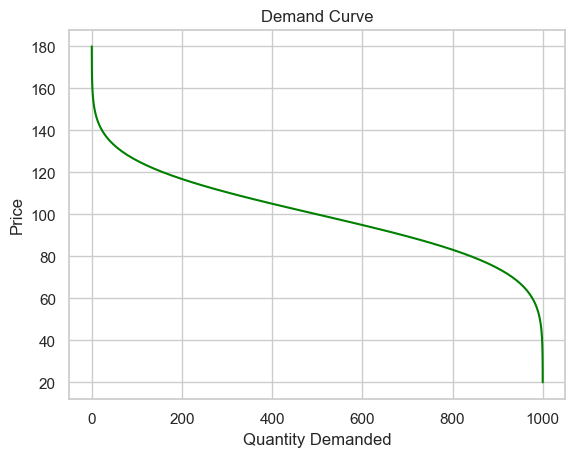

In [211]:
plt.plot(cdf_dist, prices, color='green')
plt.title('Demand Curve')
plt.xlabel('Quantity Demanded')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Graphs Side-by-Side

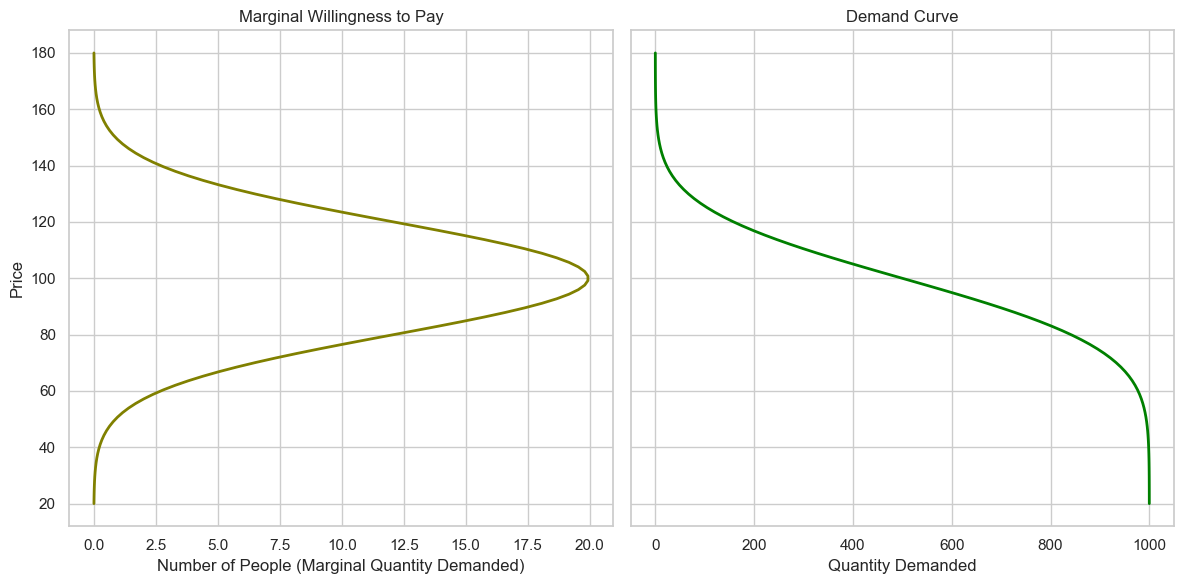

In [222]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_dist, prices, linewidth=2, color='olive')
ax1.set_title('Marginal Willingness to Pay')
ax1.set_xlabel('Number of People (Marginal Quantity Demanded)')
ax1.set_ylabel('Price')
ax1.grid(True)
ax2.plot(cdf_dist, prices, linewidth=2, color='green')
ax2.set_title('Demand Curve')
ax2.set_xlabel('Quantity Demanded')
ax2.grid(True)
plt.tight_layout()
plt.show()

### Normal Supply

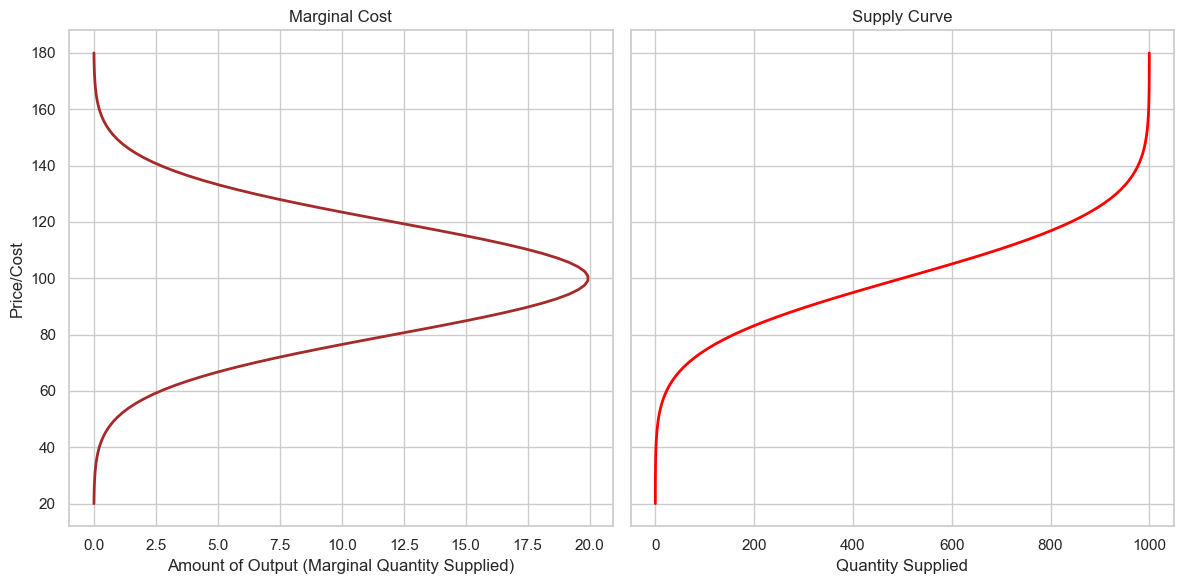

In [234]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_dist, prices, linewidth=2, color='brown')
ax1.set_title('Marginal Cost')
ax1.set_xlabel('Amount of Output (Marginal Quantity Supplied)')
ax1.set_ylabel('Price/Cost')
ax1.grid(True)
ax2.plot(cdf_dist_supply, prices, linewidth=2, color='red')
ax2.set_title('Supply Curve')
ax2.set_xlabel('Quantity Supplied')
ax2.grid(True)
plt.tight_layout()
plt.show()

### 'Normal' Market

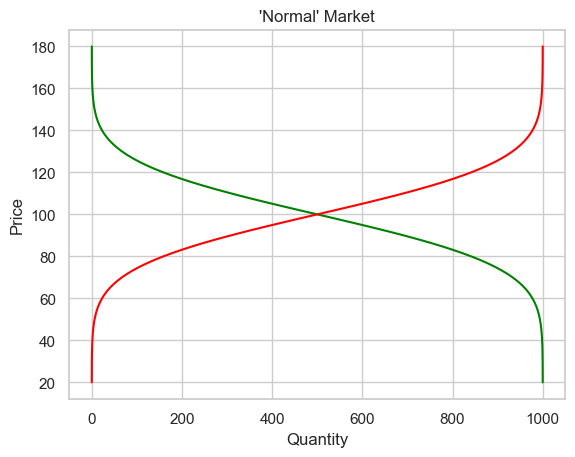

In [243]:
plt.plot(cdf_dist, prices, color='green')
plt.plot(cdf_dist_supply, prices, color='red')
plt.title('\'Normal\' Market')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True)
plt.show()

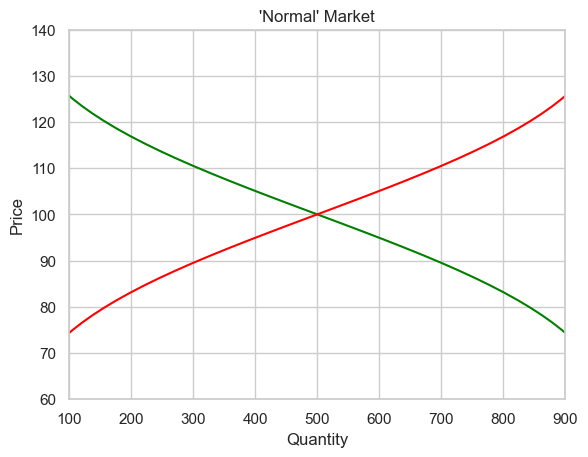

In [253]:
plt.plot(cdf_dist, prices, color='green')
plt.plot(cdf_dist_supply, prices, color='red')
plt.title('\'Normal\' Market')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.xlim(100, 900)
plt.ylim(60, 140)
plt.grid(True)
plt.show()

## Bimodal Distribution

In [369]:
# Parameters for the normal distributions
mean_one = 60      # Mean of lower distribution
mean_two = 180      # Mean of lower distribution

std_dev = 20   # Standard deviation
graph_std_devs = 4 
num_market_participants = 1000

prices = np.linspace(mean_one - graph_std_devs * std_dev, mean_two + graph_std_devs * std_dev, (mean_two - mean_one) // 2 + mean_one)
pdf_dist = norm.pdf(prices, loc=mean_one, scale=std_dev) * (num_market_participants / 2) + norm.pdf(prices, loc=mean_two, scale=std_dev) * (num_market_participants / 2)
cdf_dist_demand = (1 - norm.cdf(prices, loc=mean_one, scale=std_dev)) * (num_market_participants / 2) + (1 - norm.cdf(prices, loc=mean_two, scale=std_dev)) * (num_market_participants / 2)# used for Demand. We use "1 - " because we count higher ones first
cdf_dist_supply = norm.cdf(prices, loc=mean_one, scale=std_dev) * (num_market_participants / 2) + norm.cdf(prices, loc=mean_two, scale=std_dev) * (num_market_participants / 2)

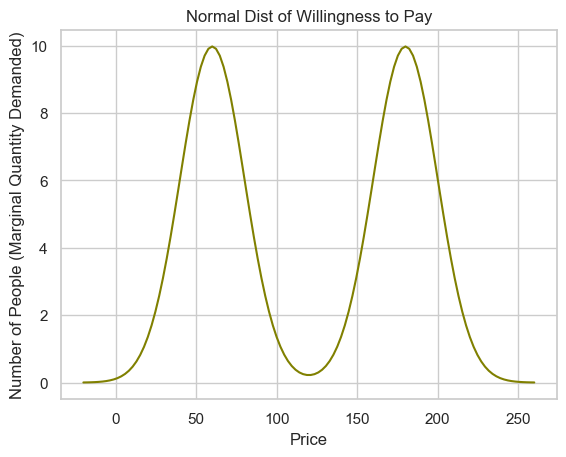

In [371]:
plt.plot(prices, pdf_dist, color='olive')
plt.title('Normal Dist of Willingness to Pay')
plt.ylabel('Number of People (Marginal Quantity Demanded)')
plt.xlabel('Price')
plt.grid(True)
plt.show()

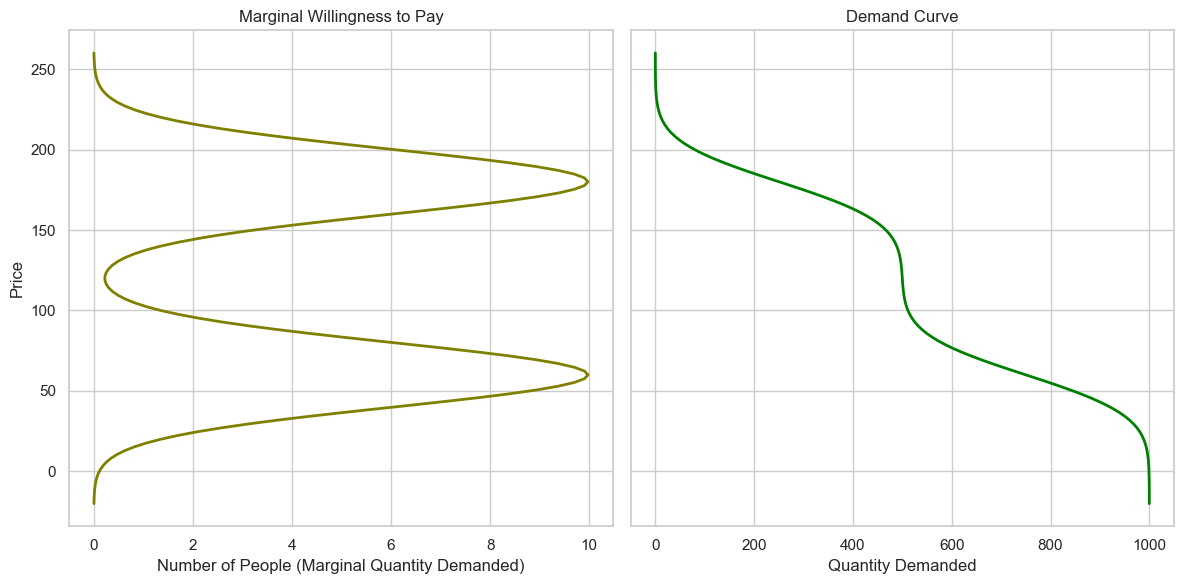

In [286]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_dist, prices, linewidth=2, color='olive')
ax1.set_title('Marginal Willingness to Pay')
ax1.set_xlabel('Number of People (Marginal Quantity Demanded)')
ax1.set_ylabel('Price')
ax1.grid(True)
ax2.plot(cdf_dist_demand, prices, linewidth=2, color='green')
ax2.set_title('Demand Curve')
ax2.set_xlabel('Quantity Demanded')
ax2.grid(True)
plt.tight_layout()
plt.show()

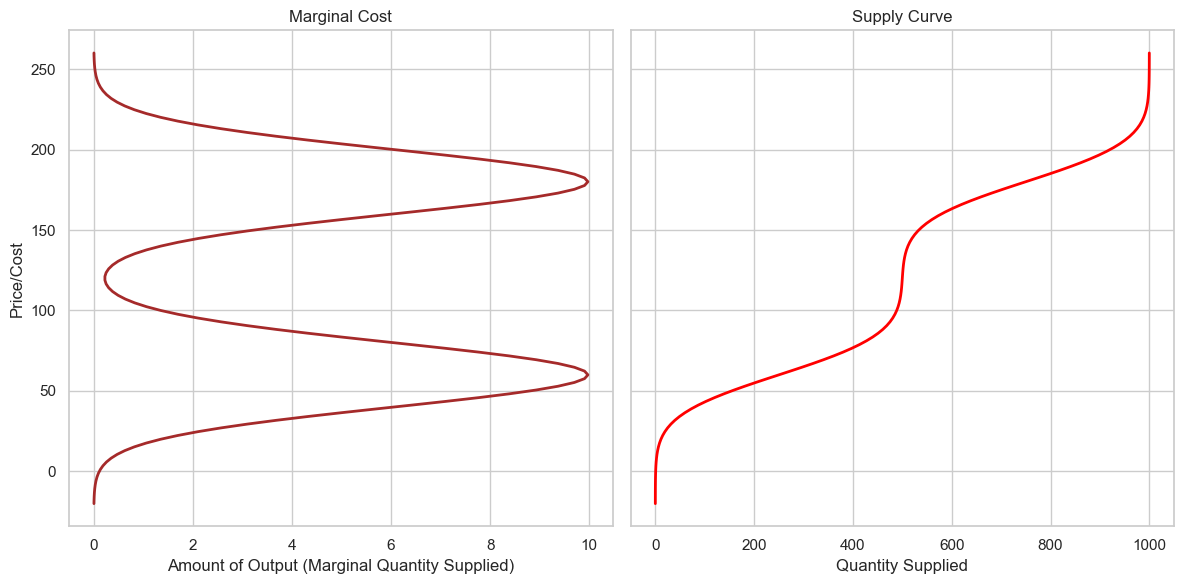

In [297]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_dist, prices, linewidth=2, color='brown')
ax1.set_title('Marginal Cost')
ax1.set_xlabel('Amount of Output (Marginal Quantity Supplied)')
ax1.set_ylabel('Price/Cost')
ax1.grid(True)
ax2.plot(cdf_dist_supply, prices, linewidth=2, color='red')
ax2.set_title('Supply Curve')
ax2.set_xlabel('Quantity Supplied')
ax2.grid(True)
plt.tight_layout()
plt.show()

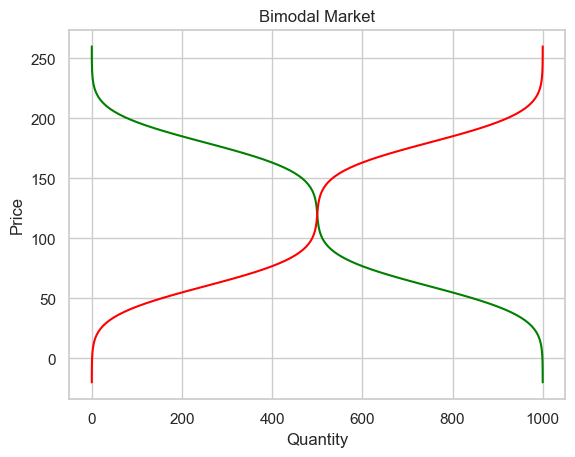

In [289]:
plt.plot(cdf_dist_demand, prices, color='green')
plt.plot(cdf_dist_supply, prices, color='red')
plt.title('Bimodal Market')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True)
plt.show()

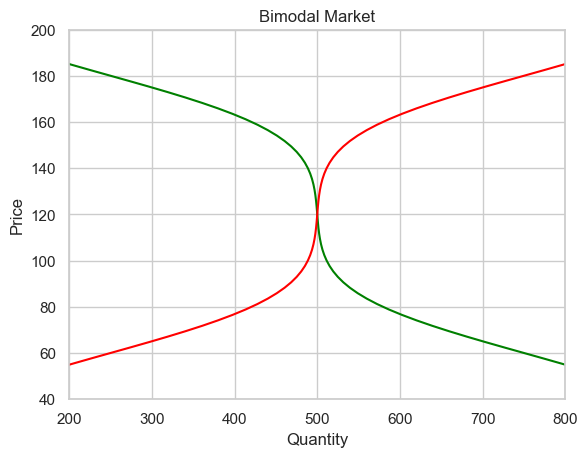

In [295]:
plt.plot(cdf_dist_demand, prices, color='green')
plt.plot(cdf_dist_supply, prices, color='red')
plt.title('Bimodal Market')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.xlim(200, 800)
plt.ylim(40, 200)
plt.grid(True)
plt.show()

## Exponential Dist

In [392]:
# Parameters for the normal distribution
mean = 100      # Mean of the distribution
std_dev = 20   # Standard deviation
graph_std_devs = 4 
num_market_participants = 1000
prices = np.linspace(0, 200)
scale = 50

# Calculate the PMF (Probability Mass Function)
pdf_curve = expon.pdf(prices, scale=scale) * num_market_participants

# Calculate the CDF (Cumulative Distribution Function)
cdf_demand = (1 - expon.cdf(prices, scale=scale)) * num_market_participants
cdf_supply = expon.cdf(prices, scale=scale) * num_market_participants

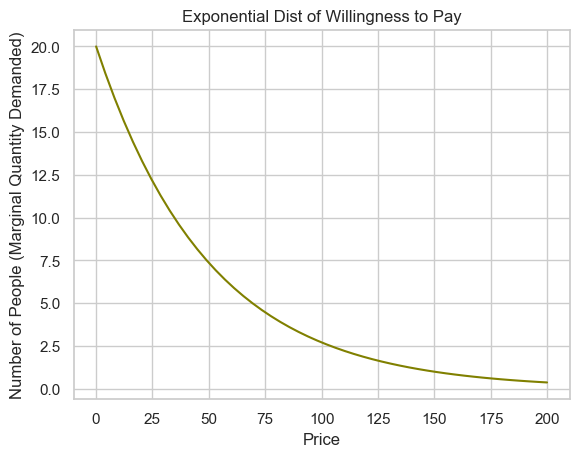

In [394]:
plt.plot(prices, pdf_curve, color='olive')
plt.title('Exponential Dist of Willingness to Pay')
plt.ylabel('Number of People (Marginal Quantity Demanded)')
plt.xlabel('Price')
plt.grid(True)
plt.show()

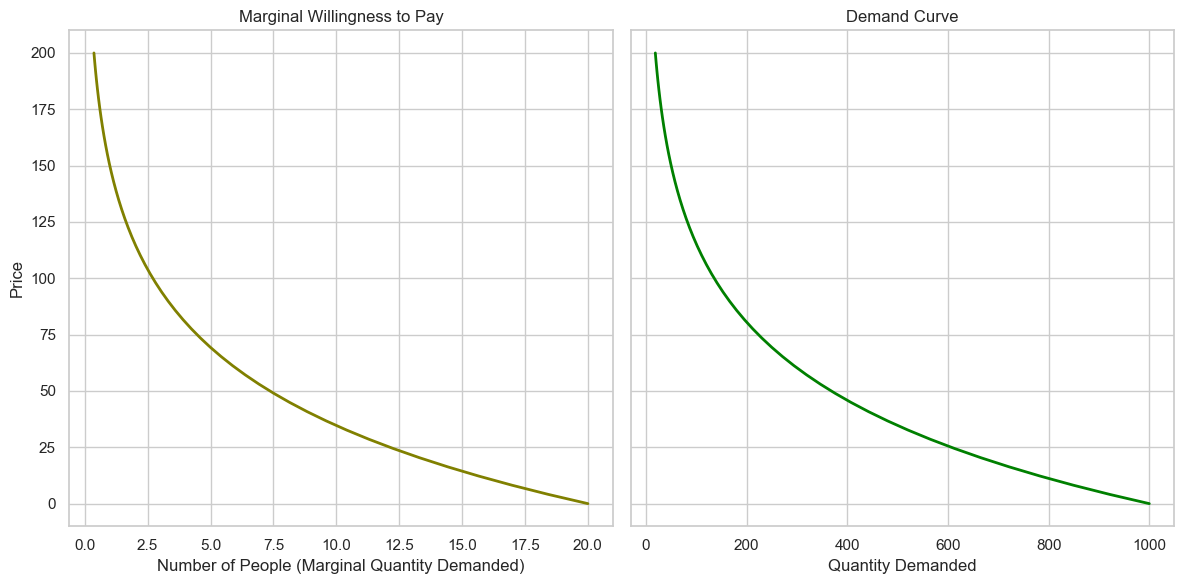

In [396]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_curve, prices, linewidth=2, color='olive')
ax1.set_title('Marginal Willingness to Pay')
ax1.set_xlabel('Number of People (Marginal Quantity Demanded)')
ax1.set_ylabel('Price')
ax1.grid(True)
ax2.plot(cdf_demand, prices, linewidth=2, color='green')
ax2.set_title('Demand Curve')
ax2.set_xlabel('Quantity Demanded')
ax2.grid(True)
plt.tight_layout()
plt.show()

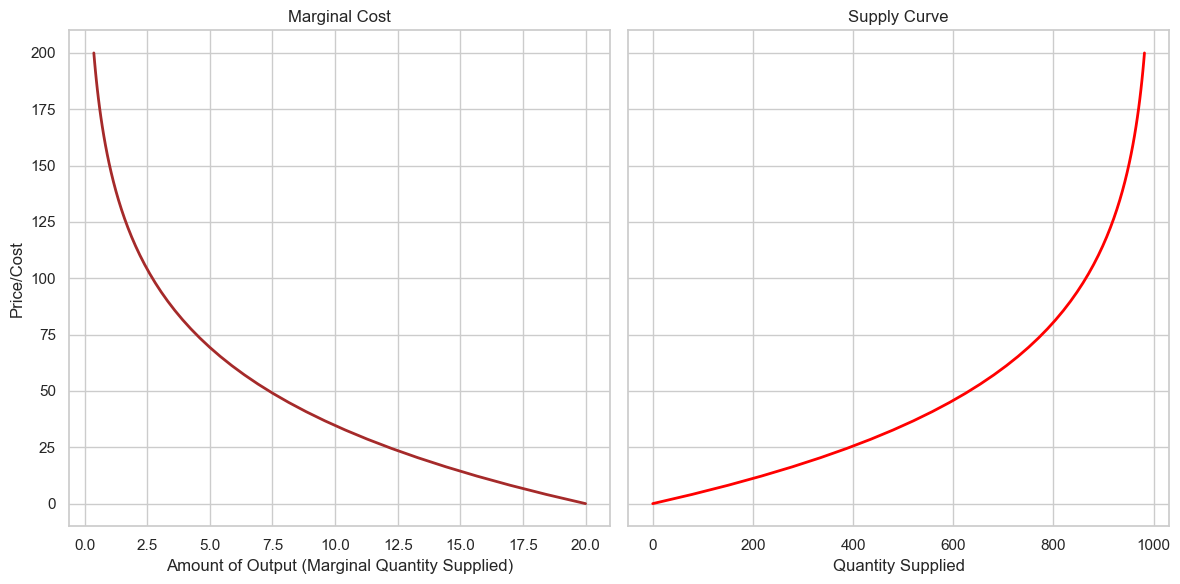

In [398]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax1.plot(pdf_curve, prices, linewidth=2, color='brown')
ax1.set_title('Marginal Cost')
ax1.set_xlabel('Amount of Output (Marginal Quantity Supplied)')
ax1.set_ylabel('Price/Cost')
ax1.grid(True)
ax2.plot(cdf_supply, prices, linewidth=2, color='red')
ax2.set_title('Supply Curve')
ax2.set_xlabel('Quantity Supplied')
ax2.grid(True)
plt.tight_layout()
plt.show()

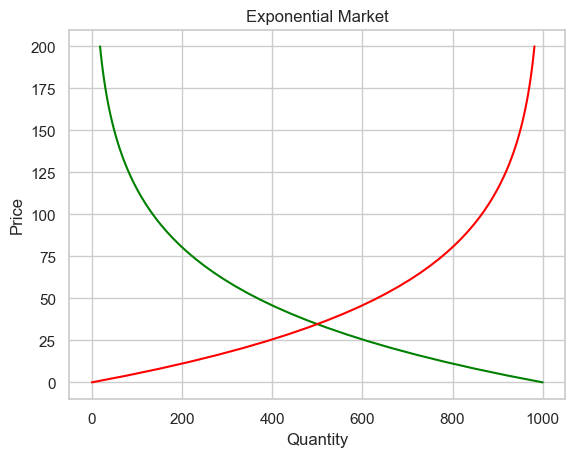

In [400]:
plt.plot(cdf_demand, prices, color='green')
plt.plot(cdf_supply, prices, color='red')
plt.title('Exponential Market')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True)
plt.show()